In [17]:
import cv2
import math
import pickle
import numpy as np

from evaluate import FDDBImg, ANIMOO

In [18]:
# choose which output to use here
EVAL_FILE = 'so_mtcnn.pkl'
with open(EVAL_FILE, 'rb') as pfile:
    results = pickle.load(pfile)

In [19]:
truepos = 0
falsepos = 0
falseneg = 0
for img in results:
    met = img.compute_metrics()
    truepos += met[0]
    falsepos += met[1]
    falseneg += met[2]

print(truepos, falsepos, falseneg)
print('Precision', truepos / (truepos + falsepos))
print('Recall', truepos / (truepos + falseneg))

2521 66318 1181
Precision 0.036621682476503145
Recall 0.6809832522960562


In [20]:
orig_dets = []
for img in results:
    _, _, _, pred_det, _ = img.compute_metrics(returnArrs=True)
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        orig_dets.append((img.pred_conf[i], pred_det[i]))

dets = sorted(orig_dets)

In [21]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

2521 66318 1181


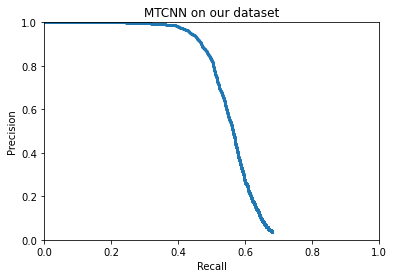

In [22]:
import matplotlib.pyplot as plt

plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on our dataset')
plt.show()

In [23]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

AP: 0.5577884612008979


In [24]:
# try cartoon faces
cartoon_dets = []
truepos = 0
falsepos = 0
falseneg = 0
for idx in range(1000):
    img = results[idx]
    tp, fp, fn, pred_det, _ = img.compute_metrics(returnArrs=True)
    truepos += tp
    falsepos += fp
    falseneg += fn
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        cartoon_dets.append((img.pred_conf[i], pred_det[i]))

cartoon_dets = sorted(cartoon_dets, key = (lambda x : x[0]))
print('TP, FP, FN:', truepos, falsepos, falseneg)

TP, FP, FN: 840 39859 1076


In [25]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in cartoon_dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

840 39859 1076


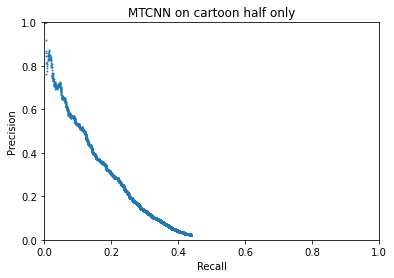

In [26]:
plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on cartoon half only')
plt.show()

In [27]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

AP: 0.14044565403243445


In [28]:
# now try just real images
real_dets = []
truepos = 0
falsepos = 0
falseneg = 0
for idx in range(1000, 2000):
    img = results[idx]
    tp, fp, fn, pred_det, _ = img.compute_metrics(returnArrs=True)
    truepos += tp
    falsepos += fp
    falseneg += fn
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        real_dets.append((img.pred_conf[i], pred_det[i]))

real_dets = sorted(real_dets, key = (lambda x : x[0]))
print('TP, FP, FN:', truepos, falsepos, falseneg)

TP, FP, FN: 1681 26459 105


In [29]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in real_dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

1681 26459 105


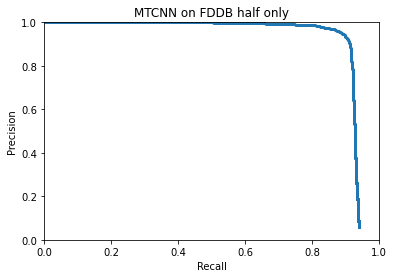

In [30]:
plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on FDDB half only')
plt.show()

In [31]:
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

AP: 0.9206083487845969


In [35]:
# take a look at what cartoons the classifier gets right
tp_patches = []
for idx in range(1000):
    img = results[idx]
    _, _, _, pred_det, ref_det = img.compute_metrics(returnArrs=True)
    for bbidx in range(len(img.pred_bboxes)):
        if not pred_det[bbidx]:
            continue
        bbox = img.pred_bboxes[bbidx]
        patch = img.get_img()[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2], :]
        tp_patches.append(patch)

print('TP patches:', len(tp_patches))

TP patches: 840


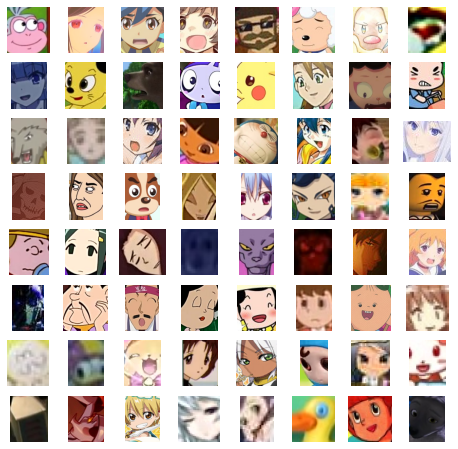

In [39]:
# display some
import random
random.shuffle(tp_patches)
f, axarr = plt.subplots(8, 8, figsize=(8, 8))
axarr = axarr.ravel()

for i in range(64):
    axarr[i].imshow(tp_patches[i])
    axarr[i].set_axis_off()

(-0.5, 223.5, 223.5, -0.5)

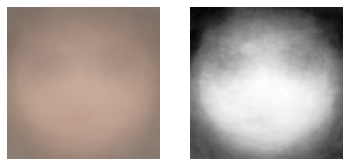

In [69]:
# try to compute average TP image
scaled_patches = np.zeros((len(tp_patches), 224, 224, 3))
for i in range(len(tp_patches)):
    # rescale
    sc_img = cv2.resize(tp_patches[i], (224, 224))
    scaled_patches[i, ...] = sc_img

avg_patch = np.mean(scaled_patches, axis=0) / 255
avg_gray_patch = np.mean(avg_patch, axis=2)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(avg_patch)
ax1.axis('off')
ax2.imshow(avg_gray_patch, cmap='Greys_r', interpolation='none')
ax2.axis('off')

In [40]:
# now do the same with confident false positives
fp_patches = []
for idx in range(1000):
    img = results[idx]
    _, _, _, pred_det, ref_det = img.compute_metrics(returnArrs=True)
    for bbidx in range(len(img.pred_bboxes)):
        if pred_det[bbidx] or img.pred_conf[bbidx] < 0.9:
            continue
        bbox = img.pred_bboxes[bbidx]
        patch = img.get_img()[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2], :]
        fp_patches.append(patch)

print('FP patches:', len(fp_patches))

FP patches: 138


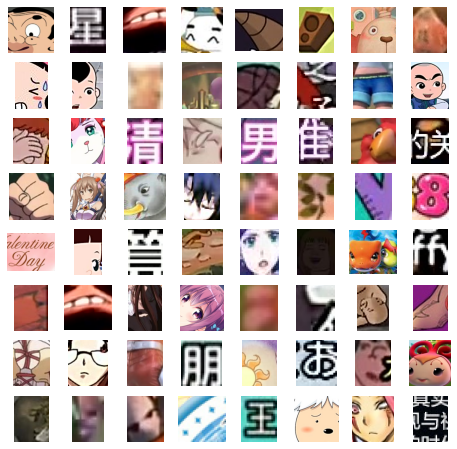

In [43]:
# display some false positives
random.shuffle(fp_patches)
f, axarr = plt.subplots(8, 8, figsize=(8, 8))
axarr = axarr.ravel()

for i in range(64):
    axarr[i].imshow(fp_patches[i])
    axarr[i].set_axis_off()

In [44]:
# and finally look at the false negatives
fn_patches = []
for idx in range(1000):
    img = results[idx]
    _, _, _, pred_det, ref_det = img.compute_metrics(returnArrs=True)
    for bbidx in range(len(img.ref_bboxes)):
        if ref_det[bbidx]:
            continue
        bbox = img.ref_bboxes[bbidx]
        patch = img.get_img()[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2], :]
        fn_patches.append(patch)

print('FP patches:', len(fn_patches))

FP patches: 1076


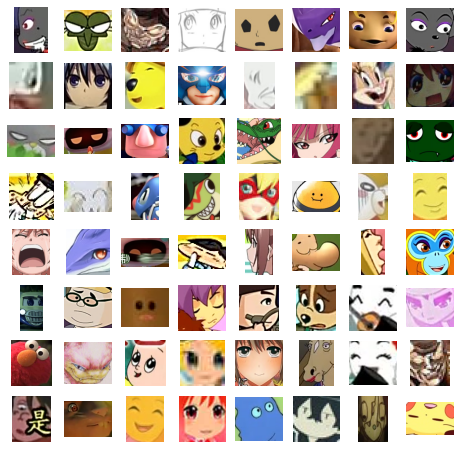

In [47]:
# display false negatives
random.shuffle(fn_patches)
f, axarr = plt.subplots(8, 8, figsize=(8, 8))
axarr = axarr.ravel()

for i in range(64):
    axarr[i].imshow(fn_patches[i])
    axarr[i].set_axis_off()